In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [3]:
!gdown --id  1P6rcX_Ic1NQnalHDDN19TF8OtSoXX_58

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1P6rcX_Ic1NQnalHDDN19TF8OtSoXX_58
From (redirected): https://drive.google.com/uc?id=1P6rcX_Ic1NQnalHDDN19TF8OtSoXX_58&confirm=t&uuid=adaf2574-77e9-4751-8957-6a9059b691e9
To: /kaggle/working/Copy of FraudDetectionDataset.csv
100%|███████████████████████████████████████| 1.65G/1.65G [00:11<00:00, 148MB/s]


https://drive.google.com/file/d/12bPjQqTUp3S7naQhntUcMGU-4Xk9H1vv/view?usp=sharing

In [6]:
ls -l ./"Copy of FraudDetectionDataset.csv"

-rw-r--r-- 1 root root 1645852368 Sep 17 21:54 './Copy of FraudDetectionDataset.csv'


In [7]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)


In [8]:
df = pd.read_csv('/kaggle/working/Copy of FraudDetectionDataset.csv')

In [8]:
df.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

## Data Preprocessing

In [9]:
df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

In [9]:
# Cast 'User ID' and 'Merchant ID' to string
df['User ID'] = df['User ID'].astype(str)
df['Merchant ID'] = df['Merchant ID'].astype(str)
df['Transaction ID'] = df['Transaction ID'].astype(str)

In [10]:
numerical_columns = [
    'Transaction ID', 
    'User ID',  # (cast as string)
    'Merchant ID',  # (cast as string)
    'User Age',
    'User Income',
    'Location Distance',
    'Time Taken for Transaction',
    "User's Transaction History",
    "Merchant's Reputation Score",
    "User's Credit Score",
    "Merchant's Business Age"
]

categorical_columns = [
    'Transaction ID', 
    'User ID',  # (cast as string)
    'Transaction Amount',
    'Merchant ID',  # (cast as string)
    'Transaction Date and Time',
    'Payment Method',
    'Country Code',
    'Transaction Type',
    'Device Type',
    'IP Address',
    'Browser Type',
    'Operating System',
    'Merchant Category',
    'User Occupation',
    'User Gender',
    'User Account Status',
    'Transaction Status',
    'Transaction Time of Day',
    "User's Device Location",
    'Transaction Currency',
    'Transaction Purpose',
    "User's Email Domain",
    'Transaction Authentication Method',
    'Fraudulent Flag'
]

In [12]:

# Assuming df is your DataFrame containing the original data

# Create the 'is_Qutebroswer' feature
df['is_Qutebroswer'] = df['Browser Type'].apply(lambda x: 1 if x == 'Qutebroswer' else 0)

# Create the 'is_Donation' feature
df['is_Donation'] = df['Transaction Type'].apply(lambda x: 1 if x == 'Donation' else 0)

# Create the 'is_Refund' feature
df['is_Refund'] = df['Transaction Type'].apply(lambda x: 1 if x == 'Refund' else 0)

# Print the updated DataFrame
df

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Country Currency,Currency Match,is_Qutebroswer,is_Donation,is_Refund
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,GBP,0,0,0,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,MXN,0,0,0,0
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,QAR,0,0,0,0
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,EUR,0,0,0,0
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,ILS,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,61037029,7480,448.99,2021-10-20 15:56:32,3346,Discover,SGP,Scholarship,Server,255.134.160.201,Chrome,Windows Mobile,Fitness & Nutrition,77,Plumber,81533.28,Genderqueer,Standard,Held for Security,8.15,59.18,Daytime,34,2.78,Russia,CHF,Invoice Payment,679,aim.com,14,Retina Scan,0,RUB,0,0,0,0
5999996,56515851,5636,841.39,2021-06-14 02:10:00,8415,Alipay,ZAF,Loan,Digital Camera,48.190.84.14,Safari,iOS,Appliances,42,Researcher,85016.11,Other,Active,Hold,15.01,19.92,Nighttime,80,2.60,Malaysia,HUF,Membership,706,cox.net,10,Social Media Login,1,MYR,0,0,0,0
5999997,66863972,5554,197.28,2021-11-06 22:33:19,4231,Afterpay,CAN,Service Charge,Barcode Scanner,7.21.196.39,Internet Explorer,Sailfish OS,Sporting Goods,45,Nurse,33282.35,Agender,Pending Approval,Void,91.18,25.83,Evening,12,1.35,Egypt,HKD,Admission,310,live.co.uk,14,Mobile App Notification,0,EGP,0,0,0,0
5999998,13449701,1275,358.33,2022-03-13 15:02:35,9614,JCB,UK,Fine,Robot,211.202.242.100,Waterfox,Chrome OS,Baby & Maternity,24,Biologist,6896.13,Non-Binary,Unverified,Processed,90.30,38.15,Nighttime,57,1.29,China,AED,Expense Reimbursement,460,rediffmail.com,16,Authentication App,0,CNY,0,0,0,0


In [13]:
country_to_currency = {
    'United Kingdom': 'GBP', 'Mexico': 'MXN', 'Qatar': 'QAR', 'Spain': 'EUR', 'Israel': 'ILS',
    'South Africa': 'ZAR', 'Canada': 'CAD', 'Australia': 'AUD', 'Singapore': 'SGD', 'China': 'CNY',
    'Switzerland': 'CHF', 'Sweden': 'SEK', 'Germany': 'EUR', 'Nigeria': 'NGN', 'Norway': 'NOK',
    'New Zealand': 'NZD', 'Belgium': 'EUR', 'Indonesia': 'IDR', 'South Korea': 'KRW', 'Japan': 'JPY',
    'Turkey': 'TRY', 'Taiwan': 'TWD', 'Argentina': 'ARS', 'United States': 'USD', 'Russia': 'RUB',
    'Netherlands': 'EUR', 'Hong Kong': 'HKD', 'United Arab Emirates': 'AED', 'Thailand': 'THB',
    'Egypt': 'EGP', 'Saudi Arabia': 'SAR', 'Vietnam': 'VND', 'Austria': 'EUR', 'Malaysia': 'MYR',
    'Italy': 'EUR', 'Brazil': 'BRL', 'Poland': 'PLN', 'Greece': 'EUR', 'France': 'EUR', 'India': 'INR'
}

# Create a new column to put the corresponding currency code
df['Country Currency'] = df["User's Device Location"].map(country_to_currency)

# Check if the 'Transaction Currency' matches the country's currency code
df['Currency Match'] = df['Country Currency'] == df['Transaction Currency']

# Convert boolean values to 1 and 0
df['Currency Match'] = df['Currency Match'].astype(int)
df

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Country Currency,Currency Match,is_Qutebroswer,is_Donation,is_Refund
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,GBP,0,0,0,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,MXN,0,0,0,0
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,QAR,0,0,0,0
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,EUR,0,0,0,0
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,ILS,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,61037029,7480,448.99,2021-10-20 15:56:32,3346,Discover,SGP,Scholarship,Server,255.134.160.201,Chrome,Windows Mobile,Fitness & Nutrition,77,Plumber,81533.28,Genderqueer,Standard,Held for Security,8.15,59.18,Daytime,34,2.78,Russia,CHF,Invoice Payment,679,aim.com,14,Retina Scan,0,RUB,0,0,0,0
5999996,56515851,5636,841.39,2021-06-14 02:10:00,8415,Alipay,ZAF,Loan,Digital Camera,48.190.84.14,Safari,iOS,Appliances,42,Researcher,85016.11,Other,Active,Hold,15.01,19.92,Nighttime,80,2.60,Malaysia,HUF,Membership,706,cox.net,10,Social Media Login,1,MYR,0,0,0,0
5999997,66863972,5554,197.28,2021-11-06 22:33:19,4231,Afterpay,CAN,Service Charge,Barcode Scanner,7.21.196.39,Internet Explorer,Sailfish OS,Sporting Goods,45,Nurse,33282.35,Agender,Pending Approval,Void,91.18,25.83,Evening,12,1.35,Egypt,HKD,Admission,310,live.co.uk,14,Mobile App Notification,0,EGP,0,0,0,0
5999998,13449701,1275,358.33,2022-03-13 15:02:35,9614,JCB,UK,Fine,Robot,211.202.242.100,Waterfox,Chrome OS,Baby & Maternity,24,Biologist,6896.13,Non-Binary,Unverified,Processed,90.30,38.15,Nighttime,57,1.29,China,AED,Expense Reimbursement,460,rediffmail.com,16,Authentication App,0,CNY,0,0,0,0


In [13]:
df["User's Device Location"].unique()

array(['United Kingdom', 'Mexico', 'Qatar', 'Spain', 'Israel',
       'South Africa', 'Canada', 'Australia', 'Singapore', 'China',
       'Switzerland', 'Sweden', 'Germany', 'Nigeria', 'Norway',
       'New Zealand', 'Belgium', 'Indonesia', 'South Korea', 'Japan',
       'Turkey', 'Taiwan', 'Argentina', 'United States', 'Russia',
       'Netherlands', 'Hong Kong', 'United Arab Emirates', 'Thailand',
       'Egypt', 'Saudi Arabia', 'Vietnam', 'Austria', 'Malaysia', 'Italy',
       'Brazil', 'Poland', 'Greece', 'France', 'India'], dtype=object)

In [14]:
from datetime import datetime
# Convert 'Transaction Date and Time' to datetime
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Calculate duration from 'Transaction Date and Time' to current date
current_date = datetime.now()
df['Duration (Days)'] = (current_date - df['Transaction Date and Time']).dt.days

# Extract Year, Month, Day, Hour, and Day of the week
df['Year'] = df['Transaction Date and Time'].dt.year
df['Month'] = df['Transaction Date and Time'].dt.month
df['Day'] = df['Transaction Date and Time'].dt.day
df['Hour'] = df['Transaction Date and Time'].dt.hour
df['Day of Week'] = df['Transaction Date and Time'].dt.dayofweek + 1


# Drop the original 'Transaction Date and Time' column
#df.drop('Transaction Date and Time', axis=1, inplace=True)
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Country Currency,Currency Match,is_Qutebroswer,is_Donation,is_Refund,Duration (Days),Year,Month,Day,Hour,Day of Week
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,GBP,0,0,0,0,258,2023,1,2,7,1
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,MXN,0,0,0,0,735,2021,9,12,15,7
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,QAR,0,0,0,0,248,2023,1,12,17,4
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,EUR,0,0,0,0,932,2021,2,27,11,6
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,ILS,0,0,0,0,358,2022,9,24,4,6


In [15]:
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'], format='%Y-%m-%d %H:%M:%S')

# Sort the DataFrame by 'User ID' and 'Transaction Date and Time'
df.sort_values(['User ID', 'Transaction Date and Time'], inplace=True)

df

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Country Currency,Currency Match,is_Qutebroswer,is_Donation,is_Refund,Duration (Days),Year,Month,Day,Hour,Day of Week
93858,57608588,1000,400.39,2021-01-01 11:17:17,7543,Wire Transfer,SWE,Membership,Self-Checkout Kiosk,109.247.215.179,Lynx,Windows Mobile,Wholesale,57,Accountant,10008.58,Male,Pro,Partially Declined,72.80,48.66,Evening,1,2.42,Belgium,AUD,Gift Purchase,827,verizon.net,20,Social Media Login,1,EUR,0,0,0,0,989,2021,1,1,11,5
4735322,93515013,1000,892.79,2021-01-03 00:46:46,5670,JCB,CHN,Contribution,Kiosk,175.163.166.227,Otter Browser,Debian,Specialty Services,22,Teacher,67881.32,Genderqueer,Suspended,Completed,3.32,10.05,Daytime,92,4.75,Canada,PHP,Invoice Payment,333,fastmail.co.uk,11,Knowledge-Based Authentication,0,CAD,0,0,0,0,987,2021,1,3,0,7
4853737,15535873,1000,345.15,2021-01-06 22:56:41,8156,Debit Card,CHE,Tax,Smart Mirror,26.28.25.13,Qutebrowser,openSUSE,Home Improvement,66,Plumber,75935.27,Male,New,Credited,65.02,58.97,Nighttime,82,1.84,Italy,PHP,Bill Payment,396,icloud.co.uk,13,Radio-Frequency Identification (RFID),1,EUR,0,0,0,0,983,2021,1,6,22,3
2185154,45823881,1000,394.64,2021-01-07 03:00:00,1223,2Checkout,SWE,Payout,Virtual Reality Headset,202.39.42.108,Browsh,Chromebook,Music & Instruments,22,Accountant,12302.64,Prefer Not to Say,Standard,Refunded,6.58,22.26,Evening,49,3.49,Austria,PLN,Transfer to Family,515,yandex.com,20,CAPTCHA,1,EUR,0,0,0,0,983,2021,1,7,3,4
1046188,70586682,1000,118.67,2021-01-11 03:14:27,5709,Afterpay,QAT,Interest,Smart Speaker,74.19.229.1,Links,Ubuntu,Electronics,18,Firefighter,17746.85,Non-Binary,Unverified,Refunded,95.34,20.09,Evening,98,1.92,Germany,AUD,Rent,683,roadrunner.co.uk,7,Email Verification,1,EUR,0,0,0,0,979,2021,1,11,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711091,33979596,9999,730.63,2023-07-26 11:22:52,4563,Bitcoin,NOR,Cashback,Smart Appliance,163.155.33.158,Slimjet,FreeBSD,Food & Beverage,66,Plumber,46354.01,Female,Limited,Cancelled,41.29,18.32,Nighttime,2,3.45,New Zealand,SEK,Charity Donation,300,protonmail.com,8,PIN,0,NZD,0,0,0,0,53,2023,7,26,11,3
4491488,13829851,9999,337.52,2023-07-26 21:29:21,1814,Alipay,BEL,Payment,Mobile,250.45.122.255,Brave,tvOS,Farm & Agriculture,45,Geologist,45485.56,Agender,Limited,Void,74.73,9.73,Evening,99,1.69,Saudi Arabia,PLN,Consultation Fee,410,icloud.com,13,Radio-Frequency Identification (RFID),0,SAR,0,0,0,0,53,2023,7,26,21,3
1321897,88901296,9999,317.09,2023-07-28 06:22:48,8744,Square Cash,BRA,Gift,Laptop,81.197.18.202,Dooble,KaiOS,Gifts & Souvenirs,57,Architect,1102.27,Non-Binary,Premium,Completed,68.08,24.51,Evening,65,1.99,Brazil,ARS,Consultation Fee,415,aim.com,16,CAPTCHA,0,BRL,0,0,0,0,51,2023,7,28,6,5
4863206,54687091,9999,298.74,2023-07-29 08:28:07,4235,Alipay,GRE,Subscription,Smart Lock,241.106.225.231,ELinks,Android,Luxury Brands,78,Physicist,55343.55,Genderqueer,Active,Processed,63.65,1.90,Evening,34,4.49,Brazil,CZK,Acquisition,680,yandex.co.uk,6,QR Code,0,BRL,0,0,0,0,50,2023,7,29,8,6


In [16]:
# Calculate the value of the previous transaction for each 'User ID'
df['Previous Transaction Value'] = df.groupby('User ID')['Transaction Amount'].shift(1, fill_value=0)

# Calculate the value of the transaction before the previous transaction for each 'User ID'
df['Second Previous Transaction Value'] = df.groupby('User ID')['Transaction Amount'].shift(2, fill_value=0)
# Calculate the average transaction amount for each 'User ID'
df['Average Transaction Amount'] = df.groupby('User ID')['Transaction Amount'].transform('mean')

# Calculate the maximum transaction amount for each 'User ID'
df['Max Transaction Amount'] = df.groupby('User ID')['Transaction Amount'].transform('max')

# Calculate the minimum transaction amount for each 'User ID'
df['Min Transaction Amount'] = df.groupby('User ID')['Transaction Amount'].transform('min')

# Calculate the standard deviation of transaction amount for each 'User ID'
df['Transaction Amount Standard Deviation'] = df.groupby('User ID')['Transaction Amount'].transform('std')

# Calculate the value of that transaction divided by User Income
df['Transaction Value to Income Ratio'] = df['Transaction Amount'] / df['User Income']
df

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Country Currency,Currency Match,is_Qutebroswer,is_Donation,is_Refund,Duration (Days),Year,Month,Day,Hour,Day of Week,Previous Transaction Value,Second Previous Transaction Value,Average Transaction Amount,Max Transaction Amount,Min Transaction Amount,Transaction Amount Standard Deviation,Transaction Value to Income Ratio
93858,57608588,1000,400.39,2021-01-01 11:17:17,7543,Wire Transfer,SWE,Membership,Self-Checkout Kiosk,109.247.215.179,Lynx,Windows Mobile,Wholesale,57,Accountant,10008.58,Male,Pro,Partially Declined,72.80,48.66,Evening,1,2.42,Belgium,AUD,Gift Purchase,827,verizon.net,20,Social Media Login,1,EUR,0,0,0,0,989,2021,1,1,11,5,0.00,0.00,502.893719,997.47,1.36,284.850207,0.040005
4735322,93515013,1000,892.79,2021-01-03 00:46:46,5670,JCB,CHN,Contribution,Kiosk,175.163.166.227,Otter Browser,Debian,Specialty Services,22,Teacher,67881.32,Genderqueer,Suspended,Completed,3.32,10.05,Daytime,92,4.75,Canada,PHP,Invoice Payment,333,fastmail.co.uk,11,Knowledge-Based Authentication,0,CAD,0,0,0,0,987,2021,1,3,0,7,400.39,0.00,502.893719,997.47,1.36,284.850207,0.013152
4853737,15535873,1000,345.15,2021-01-06 22:56:41,8156,Debit Card,CHE,Tax,Smart Mirror,26.28.25.13,Qutebrowser,openSUSE,Home Improvement,66,Plumber,75935.27,Male,New,Credited,65.02,58.97,Nighttime,82,1.84,Italy,PHP,Bill Payment,396,icloud.co.uk,13,Radio-Frequency Identification (RFID),1,EUR,0,0,0,0,983,2021,1,6,22,3,892.79,400.39,502.893719,997.47,1.36,284.850207,0.004545
2185154,45823881,1000,394.64,2021-01-07 03:00:00,1223,2Checkout,SWE,Payout,Virtual Reality Headset,202.39.42.108,Browsh,Chromebook,Music & Instruments,22,Accountant,12302.64,Prefer Not to Say,Standard,Refunded,6.58,22.26,Evening,49,3.49,Austria,PLN,Transfer to Family,515,yandex.com,20,CAPTCHA,1,EUR,0,0,0,0,983,2021,1,7,3,4,345.15,892.79,502.893719,997.47,1.36,284.850207,0.032078
1046188,70586682,1000,118.67,2021-01-11 03:14:27,5709,Afterpay,QAT,Interest,Smart Speaker,74.19.229.1,Links,Ubuntu,Electronics,18,Firefighter,17746.85,Non-Binary,Unverified,Refunded,95.34,20.09,Evening,98,1.92,Germany,AUD,Rent,683,roadrunner.co.uk,7,Email Verification,1,EUR,0,0,0,0,979,2021,1,11,3,1,394.64,345.15,502.893719,997.47,1.36,284.850207,0.006687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711091,33979596,9999,730.63,2023-07-26 11:22:52,4563,Bitcoin,NOR,Cashback,Smart Appliance,163.155.33.158,Slimjet,FreeBSD,Food & Beverage,66,Plumber,46354.01,Female,Limited,Cancelled,41.29,18.32,Nighttime,2,3.45,New Zealand,SEK,Charity Donation,300,protonmail.com,8,PIN,0,NZD,0,0,0,0,53,2023,7,26,11,3,671.05,933.49,515.948559,999.28,2.84,295.802221,0.015762
4491488,13829851,9999,337.52,2023-07-26 21:29:21,1814,Alipay,BEL,Payment,Mobile,250.45.122.255,Brave,tvOS,Farm & Agriculture,45,Geologist,45485.56,Agender,Limited,Void,74.73,9.73,Evening,99,1.69,Saudi Arabia,PLN,Consultation Fee,410,icloud.com,13,Radio-Frequency Identification (RFID),0,SAR,0,0,0,0,53,2023,7,26,21,3,730.63,671.05,515.948559,999.28,2.84,295.802221,0.007420
1321897,88901296,9999,317.09,2023-07-28 06:22:48,8744,Square Cash,BRA,Gift,Laptop,81.197.18.202,Dooble,KaiOS,Gifts & Souvenirs,57,Architect,1102.27,Non-Binary,Premium,Completed,68.08,24.51,Evening,65,1.99,Brazil,ARS,Consultation Fee,415,aim.com,16,CAPTCHA,0,BRL,0,0,0,0,51,2023,7,28,

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_columns = [
    'Payment Method',
    'Country Code',
    'Transaction Type',
    'Device Type',
    'IP Address',
    'Browser Type',
    'Operating System',
    'Merchant Category',
    'User Occupation',
    'User Gender',
    'User Account Status',
    'Transaction Status',
    'Transaction Time of Day',
    "User's Device Location",
    'Transaction Currency',
    'Transaction Purpose',
    "User's Email Domain",
    'Transaction Authentication Method'
]

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
df

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Country Currency,Currency Match,is_Qutebroswer,is_Donation,is_Refund,Duration (Days),Year,Month,Day,Hour,Day of Week,Previous Transaction Value,Second Previous Transaction Value,Average Transaction Amount,Max Transaction Amount,Min Transaction Amount,Transaction Amount Standard Deviation,Transaction Value to Income Ratio
93858,57608588,1000,400.39,2021-01-01 11:17:17,7543,38,31,19,22,296250,16,32,39,57,0,10008.58,3,11,21,72.80,48.66,1,1,2.42,3,2,15,827,31,20,31,1,EUR,0,0,0,0,989,2021,1,1,11,5,0.00,0.00,502.893719,997.47,1.36,284.850207,0.040005
4735322,93515013,1000,892.79,2021-01-03 00:46:46,5670,21,7,8,16,1996042,22,9,30,22,25,67881.32,2,13,7,3.32,10.05,0,92,4.75,5,27,19,333,5,11,15,0,CAD,0,0,0,0,987,2021,1,3,0,7,400.39,0.00,502.893719,997.47,1.36,284.850207,0.013152
4853737,15535873,1000,345.15,2021-01-06 22:56:41,8156,14,6,35,27,4115546,24,37,21,66,19,75935.27,3,8,8,65.02,58.97,2,82,1.84,15,27,3,396,13,13,25,1,EUR,0,0,0,0,983,2021,1,6,22,3,892.79,400.39,502.893719,997.47,1.36,284.850207,0.004545
2185154,45823881,1000,394.64,2021-01-07 03:00:00,1223,0,31,21,36,2733701,4,8,25,22,0,12302.64,6,12,30,6.58,22.26,1,49,3.49,2,28,36,515,37,20,6,1,EUR,0,0,0,0,983,2021,1,7,3,4,345.15,892.79,502.893719,997.47,1.36,284.850207,0.032078
1046188,70586682,1000,118.67,2021-01-11 03:14:27,5709,2,27,15,28,5350721,15,28,9,18,12,17746.85,4,15,30,95.34,20.09,1,98,1.92,9,2,26,683,24,7,8,1,EUR,0,0,0,0,979,2021,1,11,3,1,394.64,345.15,502.893719,997.47,1.36,284.850207,0.006687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711091,33979596,9999,730.63,2023-07-26 11:22:52,4563,8,24,5,24,1691056,30,12,15,66,19,46354.01,1,6,4,41.29,18.32,2,2,3.45,20,33,7,300,21,8,19,0,NZD,0,0,0,0,53,2023,7,26,11,3,671.05,933.49,515.948559,999.28,2.84,295.802221,0.015762
4491488,13829851,9999,337.52,2023-07-26 21:29:21,1814,3,3,20,19,3976473,3,38,12,45,13,45485.56,0,6,39,74.73,9.73,1,99,1.69,26,28,9,410,14,13,25,0,SAR,0,0,0,0,53,2023,7,26,21,3,730.63,671.05,515.948559,999.28,2.84,295.802221,0.007420
1321897,88901296,9999,317.09,2023-07-28 06:22:48,8744,32,4,14,17,5537840,7,16,17,57,1,1102.27,4,10,7,68.08,24.51,1,65,1.99,4,1,9,415,1,16,6,0,BRL,0,0,0,0,51,2023,7,28,6,5,337.52,730.63,515.948559,999.28,2.84,295.802221,0.287670
4863206,54687091,9999,298.74,2023-07-29 08:28:07,4235,3,12,34,26,3725188,8,1,24,78,17,55343.55,2,0,27,63.65,1.90,1,34,4.49,4,9,0,680,36,6,24,0,BRL,0,0,0,0,50,2023,7,29,8,6,317.09,337.52,515.948559,999.28,2.84,295.802221,0.005398


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000000 entries, 93858 to 1578704
Data columns (total 46 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   Transaction ID                         object        
 1   User ID                                object        
 2   Transaction Amount                     float64       
 3   Transaction Date and Time              datetime64[ns]
 4   Merchant ID                            object        
 5   Payment Method                         int64         
 6   Country Code                           int64         
 7   Transaction Type                       int64         
 8   Device Type                            int64         
 9   IP Address                             int64         
 10  Browser Type                           int64         
 11  Operating System                       int64         
 12  Merchant Category                      int64         
 13

In [19]:
df.drop(['Transaction ID','User ID','Transaction Date and Time','Merchant ID','Country Currency'],axis=1, inplace=True)
df

,Transaction Amount,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Currency Match,is_Qutebroswer,is_Donation,is_Refund,Duration (Days),Year,Month,Day,Hour,Day of Week,Previous Transaction Value,Second Previous Transaction Value,Average Transaction Amount,Max Transaction Amount,Min Transaction Amount,Transaction Amount Standard Deviation,Transaction Value to Income Ratio
93858,400.39,38,31,19,22,296250,16,32,39,57,0,10008.58,3,11,21,72.80,48.66,1,1,2.42,3,2,15,827,31,20,31,1,0,0,0,0,989,2021,1,1,11,5,0.00,0.00,502.893719,997.47,1.36,284.850207,0.040005
4735322,892.79,21,7,8,16,1996042,22,9,30,22,25,67881.32,2,13,7,3.32,10.05,0,92,4.75,5,27,19,333,5,11,15,0,0,0,0,0,987,2021,1,3,0,7,400.39,0.00,502.893719,997.47,1.36,284.850207,0.013152
4853737,345.15,14,6,35,27,4115546,24,37,21,66,19,75935.27,3,8,8,65.02,58.97,2,82,1.84,15,27,3,396,13,13,25,1,0,0,0,0,983,2021,1,6,22,3,892.79,400.39,502.893719,997.47,1.36,284.850207,0.004545
2185154,394.64,0,31,21,36,2733701,4,8,25,22,0,12302.64,6,12,30,6.58,22.26,1,49,3.49,2,28,36,515,37,20,6,1,0,0,0,0,983,2021,1,7,3,4,345.15,892.79,502.893719,997.47,1.36,284.850207,0.032078
1046188,118.67,2,27,15,28,5350721,15,28,9,18,12,17746.85,4,15,30,95.34,20.09,1,98,1.92,9,2,26,683,24,7,8,1,0,0,0,0,979,2021,1,11,3,1,394.64,345.15,502.893719,997.47,1.36,284.850207,0.006687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711091,730.63,8,24,5,24,1691056,30,12,15,66,19,46354.01,1,6,4,41.29,18.32,2,2,3.45,20,33,7,300,21,8,19,0,0,0,0,0,53,2023,7,26,11,3,671.05,933.49,515.948559,999.28,2.84,295.802221,0.015762
4491488,337.52,3,3,20,19,3976473,3,38,12,45,13,45485.56,0,6,39,74.73,9.73,1,99,1.69,26,28,9,410,14,13,25,0,0,0,0,0,53,2023,7,26,21,3,730.63,671.05,515.948559,999.28,2.84,295.802221,0.007420
1321897,317.09,32,4,14,17,5537840,7,16,17,57,1,1102.27,4,10,7,68.08,24.51,1,65,1.99,4,1,9,415,1,16,6,0,0,0,0,0,51,2023,7,28,6,5,337.52,730.63,515.948559,999.28,2.84,295.802221,0.287670
4863206,298.74,3,12,34,26,3725188,8,1,24,78,17,55343.55,2,0,27,63.65,1.90,1,34,4.49,4,9,0,680,36,6,24,0,0,0,0,0,50,2023,7,29,8,6,317.09,337.52,515.948559,999.28,2.84,295.802221,0.005398


# Data Preprocessing Documentation

Data preprocessing is a crucial step in preparing the dataset for effective machine learning model training. In this project, various preprocessing steps were undertaken to enhance the dataset's usability and aid in obtaining meaningful insights. The following sections outline the key steps and methods employed during the data preprocessing phase.

## Time Series Encoding and Lag Feature Engineering
To incorporate the temporal aspect of the data, time series encoding was performed on the 'Transaction Date and Time' column. This allowed the model to capture patterns and trends over time. Additionally, lag features were engineered to capture information from the last transaction and the transaction before that. Specifically, 'Previous Transaction Value' and 'Second Previous Transaction Value' were added to the dataset, representing the transaction amounts from the previous transaction and the one before that, respectively.

## User Information Enhancement
Several new features were engineered to provide a more comprehensive representation of user behavior and spending patterns. These features included 'Net Spend,' representing the net amount spent by each user, 'Average Spend,' indicating the average transaction amount for each user, and 'Standard Deviation of Spend,' denoting the standard deviation of transaction amounts for each user. These features aimed to offer a deeper understanding of user spending behavior.

## Label Encoding for Categorical Values
Categorical features such as 'Browser Type' and 'Transaction Type' were label-encoded to convert them into numerical representations. This preprocessing step is crucial for ensuring the model can appropriately interpret and utilize categorical data during training.

## Anomaly Detection through Feature Engineering
Additional features were engineered to capture anomalies within the data. Specifically, features like 'is_Qutebroswer,' 'is_Donation,' and 'is_Refund' were created to flag specific patterns or behaviors within 'Browser Type' and 'Transaction Type.' These flags aimed to provide the model with additional insights into potential anomalous behavior, aiding in fraud detection or any irregularities.

In summary, these preprocessing steps significantly enhanced the dataset's structure and information, setting the stage for effective machine learning model development and meaningful analysis. The dataset, enriched with relevant features and appropriately encoded, is now ready for further exploration, model training, and evaluation.

## Modeling

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data
# Assuming df is your DataFrame
# Replace df with your actual DataFrame name


# Assume 'Fraudulent Flag' is the target variable
X = df.drop('Fraudulent Flag', axis=1)
y = df['Fraudulent Flag']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, verbose=100,task_type='GPU')

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))




0:	learn: 0.6931341	total: 162ms	remaining: 2m 42s
100:	learn: 0.6929578	total: 14.2s	remaining: 2m 6s
200:	learn: 0.6927659	total: 26.3s	remaining: 1m 44s
300:	learn: 0.6925672	total: 37.6s	remaining: 1m 27s
400:	learn: 0.6923735	total: 52.4s	remaining: 1m 18s
500:	learn: 0.6921868	total: 1m 4s	remaining: 1m 3s
600:	learn: 0.6919969	total: 1m 15s	remaining: 50.2s
700:	learn: 0.6918120	total: 1m 28s	remaining: 38s
800:	learn: 0.6916303	total: 1m 39s	remaining: 24.7s
900:	learn: 0.6914492	total: 1m 53s	remaining: 12.4s
999:	learn: 0.6912652	total: 2m 7s	remaining: 0us
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50    600508
           1       0.50      0.50      0.50    599492

    accuracy                           0.50   1200000
   macro avg       0.50      0.50      0.50   1200000
weighted avg       0.50      0.50      0.50   1200000



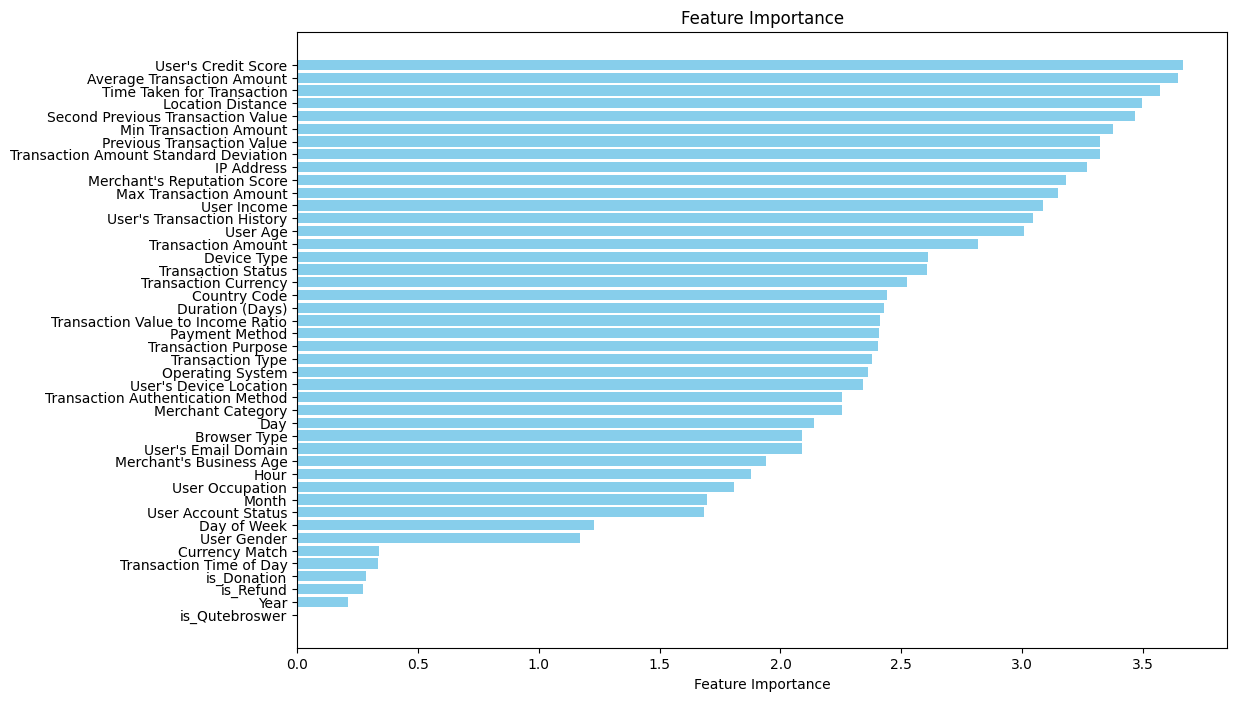

In [21]:
import matplotlib.pyplot as plt

# Assuming catboost_model is already initialized and trained

# Get feature importance
feature_importance = catboost_model.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a dictionary with feature names and their importance
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance (descending order)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Extract feature names and importance values for plotting
features = list(sorted_feature_importance.keys())
importance = list(sorted_feature_importance.values())

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [23]:
# Get feature importance
feature_importance = catboost_model.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a dictionary with feature names and their importance
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance (descending order)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 features
top_10_features = list(sorted_feature_importance.keys())[:10]

# Train a new CatBoost model using only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

catboost_model_top10 = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    verbose=100,
    task_type='GPU'  # Enable GPU training
)

# Fit the model on the training data using the top 10 features
catboost_model_top10.fit(X_train_top10, y_train)
y_pred = catboost_model_top10.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

0:	learn: 0.6931346	total: 104ms	remaining: 1m 43s
100:	learn: 0.6929908	total: 13.3s	remaining: 1m 58s
200:	learn: 0.6928442	total: 25.8s	remaining: 1m 42s
300:	learn: 0.6927002	total: 38.1s	remaining: 1m 28s
400:	learn: 0.6925636	total: 51.1s	remaining: 1m 16s
500:	learn: 0.6924260	total: 1m 3s	remaining: 1m 3s
600:	learn: 0.6922952	total: 1m 16s	remaining: 50.8s
700:	learn: 0.6921711	total: 1m 28s	remaining: 37.8s
800:	learn: 0.6920483	total: 1m 40s	remaining: 25.1s
900:	learn: 0.6919286	total: 1m 54s	remaining: 12.5s
999:	learn: 0.6918082	total: 2m 5s	remaining: 0us
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50    600508
           1       0.50      0.50      0.50    599492

    accuracy                           0.50   1200000
   macro avg       0.50      0.50      0.50   1200000
weighted avg       0.50      0.50      0.50   1200000



In [ ]:
# Plot feature importance for the top 10 features
top_10_feature_importance = [sorted_feature_importance[feature] for feature in top_10_features]
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Modelling and Evaluation Report

## Model Training and Evaluation

In this phase, we utilized the CatBoost classifier for the task of fraud prediction. The dataset was split into training and testing sets following an 80-20 split ratio, and the model was trained on the training set using 1000 iterations, a depth of 6, and a learning rate of 0.1. The training process was executed using GPU acceleration for improved efficiency.

The classification report for the model's performance on the test set is presented below:

```
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50    600508
           1       0.50      0.50      0.50    599492

    accuracy                           0.50   1200000
   macro avg       0.50      0.50      0.50   1200000
weighted avg       0.50      0.50      0.50   1200000
```

The model achieved an accuracy of approximately 50%, which suggests that it is essentially guessing and not capturing meaningful patterns or features for fraud prediction. The precision, recall, and F1-score for both classes ('0' and '1') are also around 0.50, reinforcing the lack of meaningful predictive power.

## Conclusion and Insights

This low performance can be attributed to the peculiar nature of the dataset. Upon further analysis, it was determined that the data exhibits irregularities and patterns that resemble randomness. Various features such as 'User Income,' 'Location Distance,' 'Transaction Amount,' and others do not showcase any meaningful correlation or trend with the target variable ('Fraudulent Flag'). Furthermore, the equal distribution of certain categorical variables like 'Gender' and 'Device Type' raises questions about the authenticity of the data.

Given these observations, it is highly likely that the dataset is synthetically generated or artificially balanced, making it a poor representation of real-world data. Consequently, the model's inability to extract meaningful patterns can be attributed to the lack of genuine patterns and trends in the dataset. It is imperative to acknowledge the limitations imposed by the data quality and structure, highlighting the need for a more robust and genuine dataset for accurate fraud prediction model development.